In [ ]:
%%javascript
IPython.notebook.clear_all_output();

# Download dataset

In [3]:
# Download the dataset
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
!unzip ut-zap50k-images.zip > /dev/null

--2021-04-15 15:42:11--  http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
Resolving vision.cs.utexas.edu (vision.cs.utexas.edu)... 128.83.120.116
Connecting to vision.cs.utexas.edu (vision.cs.utexas.edu)|128.83.120.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305323328 (291M) [application/zip]
Saving to: ‘ut-zap50k-images.zip’

100%[======================================>] 305,323,328 45.8MB/s   in 16s    

2021-04-15 15:42:27 (18.7 MB/s) - ‘ut-zap50k-images.zip’ saved [305323328/305323328]



In [2]:
!rm -rf ut-zap50k-images.zip;

In [36]:
import os 
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from glob import glob
import matplotlib.image as image
import splitfolders 

from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [11]:
dir_name = "./data"
isDir = os.path.isdir(dir_name) 
if not isDir:
    !mkdir data
    !mkdir data/Boots data/Sandals data/Shoes data/Slippers
    !find ut-zap50k-images/Boots -type f -name "*.jpg" | head -1500 | xargs -d '\n' mv -t data/Boots;
    !find ut-zap50k-images/Sandals -type f -name "*.jpg" | head -1500 | xargs -d '\n' mv -t data/Sandals;
    !find ut-zap50k-images/Shoes -type f -name "*.jpg" | head -1500 | xargs -d '\n' mv -t data/Shoes;
    !find ut-zap50k-images/Slippers -type f -print0 | xargs -0 mv -t data/Slippers;
    !rm -rf ut-zap50k-images;

In [13]:
files='**/*.jpg'
filenames = glob(os.path.join(dir_name, files))
classes = [os.path.basename(os.path.dirname(name)) for name in filenames]
count = list(Counter(classes).items())
print("Class count:", count);

Class count: [('Slippers', 1283), ('Sandals', 1500), ('Boots', 1500), ('Shoes', 1500)]


In [16]:
class_names = os.listdir(dir_name) # Get names of classes
class_name2id = { label: index for index, label in enumerate(class_names) } # Map class names to integer labels
print("Classes:", class_name2id)

labels = [class_name2id[c] for c in classes]
Counter(labels)

Classes: {'Slippers': 0, 'Sandals': 1, 'Boots': 2, 'Shoes': 3}


Counter({0: 1283, 1: 1500, 2: 1500, 3: 1500})

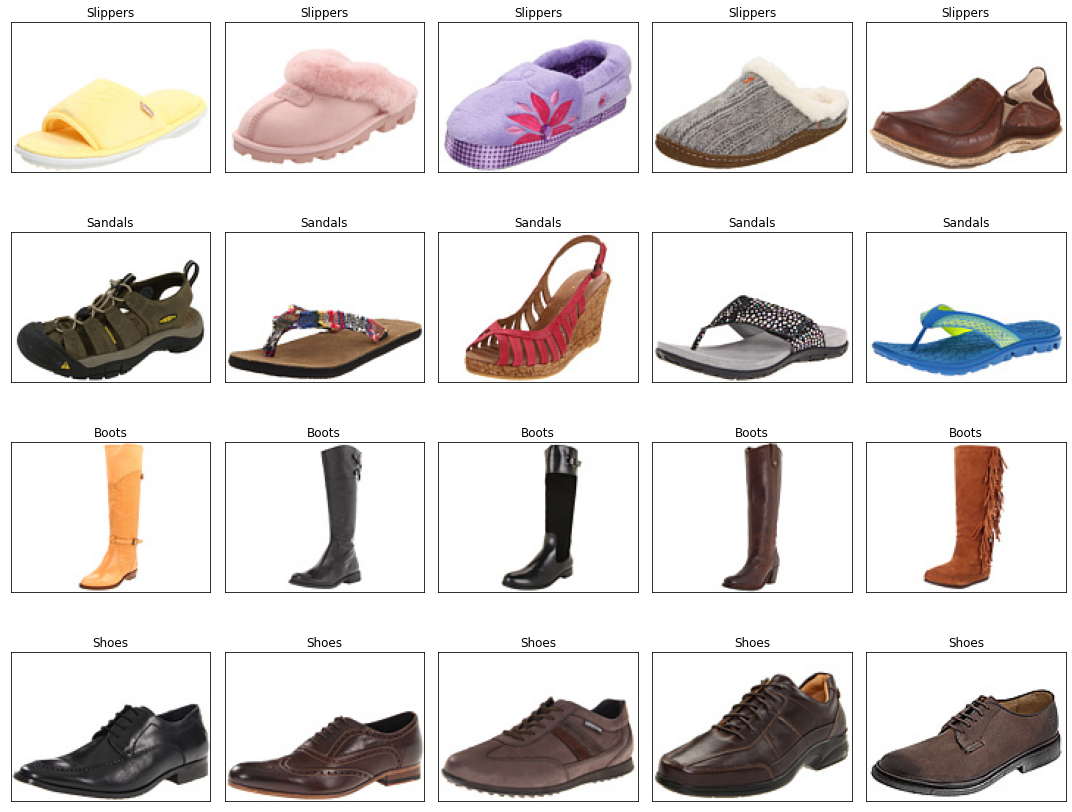

In [33]:
def visual_figure(ax, file, title):
    img = image.imread(file)
    ax.imshow(img)
    ax.title.set_text(title)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig = plt.figure(figsize=(15, 12))
axs = fig.subplots(4, 5)
for i in range(5):
    id_1 = i+count[0][1]
    id_2 = id_1+count[1][1]
    id_3 = id_2+count[2][1]
    visual_figure(axs[0,i], filenames[i], classes[i])
    visual_figure(axs[1,i], filenames[id_1], classes[id_1])
    visual_figure(axs[2,i], filenames[id_2], classes[id_2])
    visual_figure(axs[3,i], filenames[id_3], classes[id_3])
fig.tight_layout()

# Processing dataset

In [35]:
# split dataset into train, test and validation
splitfolders.ratio('data', output="splitted_data", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 5783 files [01:05, 88.09 files/s] 


In [ ]:
# config

In [ ]:
img_width = 224

def get_image(filename):
    ########################################################################
    img_obj = load_img(filename, target_size=(224, 224)) # image object
    numpy_image = img_to_array(img_obj) # image object -> pixel array
    return numpy_image
    ########################################################################